**Problem Statement**

Stroke is a leading cause of death and disability worldwide. Early detection and intervention are crucial for improving patient outcomes. Binary classification with tabular data offers a promising approach to predict the risk of stroke, allowing healthcare professionals to take proactive measures.



**Objective:**

The goal is to build a classification model that can accurately predict whether a patient is likely to experience a stroke based on these features. The model outputs a binary label: 0 for no stroke and 1 for stroke.

**Benefits:**

1. Early intervention: Predicting stroke risk can enable timely interventions such as lifestyle changes, medication adjustments, or preventive surgeries.

2. Resource allocation: Healthcare resources can be prioritized towards patients at higher risk, improving resource utilization.

3. Personalized medicine: Models can help personalize treatment plans and risk management strategies for individual patients.


Overall, binary classification with tabular data holds promise for improving stroke prediction. However, it's essential to address the challenges and consider ethical implications to develop a reliable and responsible model.

In [ ]:
#import all the libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the data
data = pd.read_csv("/content/Tabular Stroke Prediction Dataset.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


**Domain Analysis**


Features:

1. id: Unique identifier for each patient.

2. gender: Patient's gender (e.g., male, female).

3. age: Patient's age in years.

4. hypertension: Whether the patient has hypertension (high blood pressure).

5. heart_disease: Whether the patient has a history of heart disease.

6. ever_married: Whether the patient is married or has ever been married.

7. work_type: Patient's work type .

8. Residence_type: Patient's residence type (e.g., urban, rural).

9. avg_glucose_level: Patient's average blood glucose level.

10. bmi: Patient's body mass index.

11. smoking_status: Whether the patient is a smoker or not.

12. stroke: Target variable indicating whether the patient experienced a stroke (0 = no, 1 = yes).

Here , column ID is dropped as it doesnt bring any learning insight to the data

In [ ]:
data.drop(columns='id',axis=1,inplace=True)

Basic checks

In [ ]:
data.shape

(15304, 11)

There is 15,304 rows and 11 columns in the data


In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


First 5 rows of the data

In [ ]:
data.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0
15303,Female,14.0,0,0,No,Private,Rural,85.12,24.7,never smoked,0


Last 5 rows of the data

In [ ]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

There are numerical, categorical columns on the data

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

These are the columns in the data

In [ ]:
num_col = data.select_dtypes(include=['int64','float64'])
num_col.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

The above are the numerical columns in the data

In [ ]:
cat_col = data.select_dtypes(include=['object'])
cat_col.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

The above are the categorical columns in the data

Since , we have categorical data we'll analyse the columns

In [ ]:
for i in cat_col:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print('----------------------')

gender ['Male' 'Female' 'Other']
Female    9446
Male      5857
Other        1
Name: gender, dtype: int64
----------------------
ever_married ['Yes' 'No']
Yes    10385
No      4919
Name: ever_married, dtype: int64
----------------------
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64
----------------------
Residence_type ['Urban' 'Rural']
Rural    7664
Urban    7640
Name: Residence_type, dtype: int64
----------------------
smoking_status ['never smoked' 'formerly smoked' 'Unknown' 'smokes']
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64
----------------------


The analysis gives all the unique value and value counts(frequency) of the value occurances

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


Info gives the entire description of the data column names , nonnull values, data types and memory usage of the data

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


The above gives the statistical analysis of the data

Since the target is binary class classification data, we'll analyse the same

In [ ]:
data.stroke.unique()

array([0, 1])

In [ ]:
data.stroke.value_counts()

0    14672
1      632
Name: stroke, dtype: int64

Since there is more infomation regarding to 0 class less to 1 class, we clearly say data is not balanced

EDA - Exploratory Data Analysis

  - Exploratory Data Analysis (EDA) is an essential phase in the data analysis process where the primary goal is to understand the main characteristics of the data. EDA involves visually and statistically summarizing the main features, patterns, and relationships within a dataset


- Univariate - Analysing single variable

   - Univariate analysis focuses on analyzing a single variable at a time to understand its distribution, central tendency, and variability.

In [ ]:
df = data[['age','avg_glucose_level', 'bmi']]


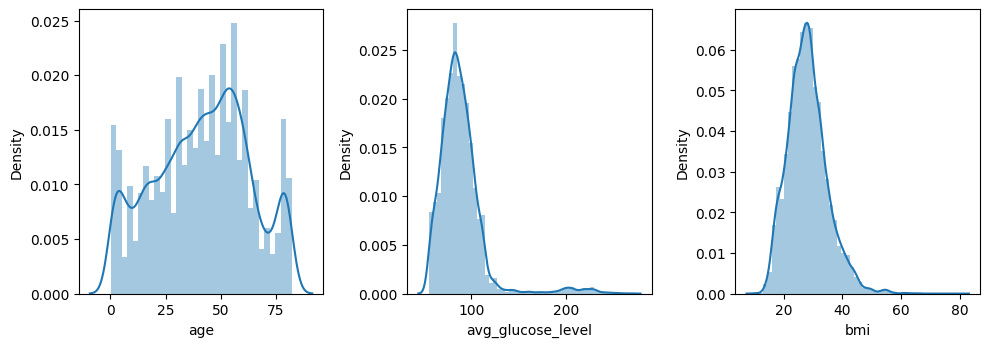

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1

for column in df:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x=num_col[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

- Insight

  - Numerical column distribution

  - age - gives not normal distribution

  - avg_glucose_level gives us right skewed distribution

  - bmi too giving right skewed distribution

In [ ]:
df1 = data[['hypertension', 'heart_disease','stroke']]

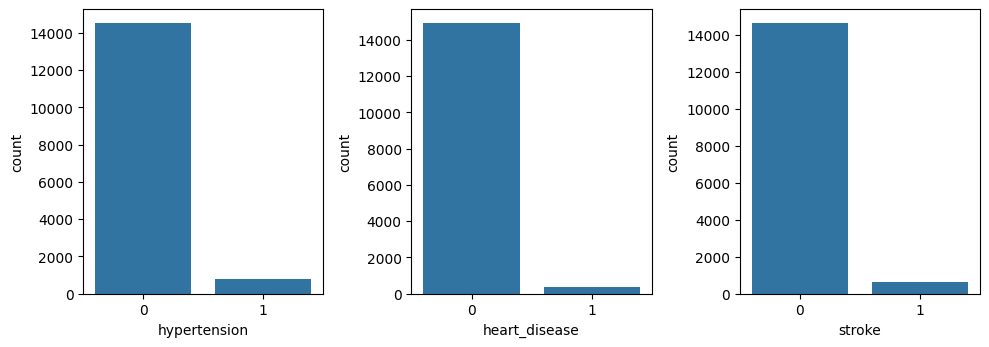

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1

for column in df1:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=num_col[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

- Insights:

 - The data has more records to people having no hyper tension

 - The data has more records to people having no hyper disease

 - The data has more records to people projected to no stroke

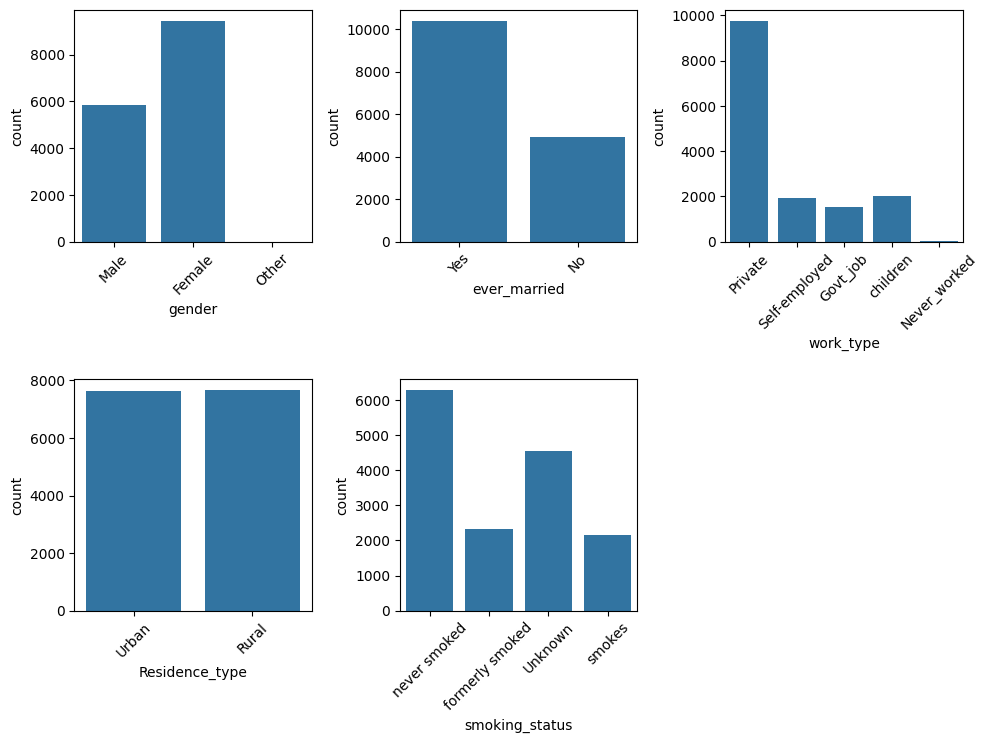

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1

for column in cat_col:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=cat_col[column])
        plt.xlabel(column,fontsize=10)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

Insights:

- The above analysis gives all the categorical attribute unique value representation and its frequency through countplot



**Bivariate analysis**

 - involves the simultaneous analysis of two variables to explore relationships, associations, or patterns between them.

We'll analyse how numerical attribute is acting aganist target stroke

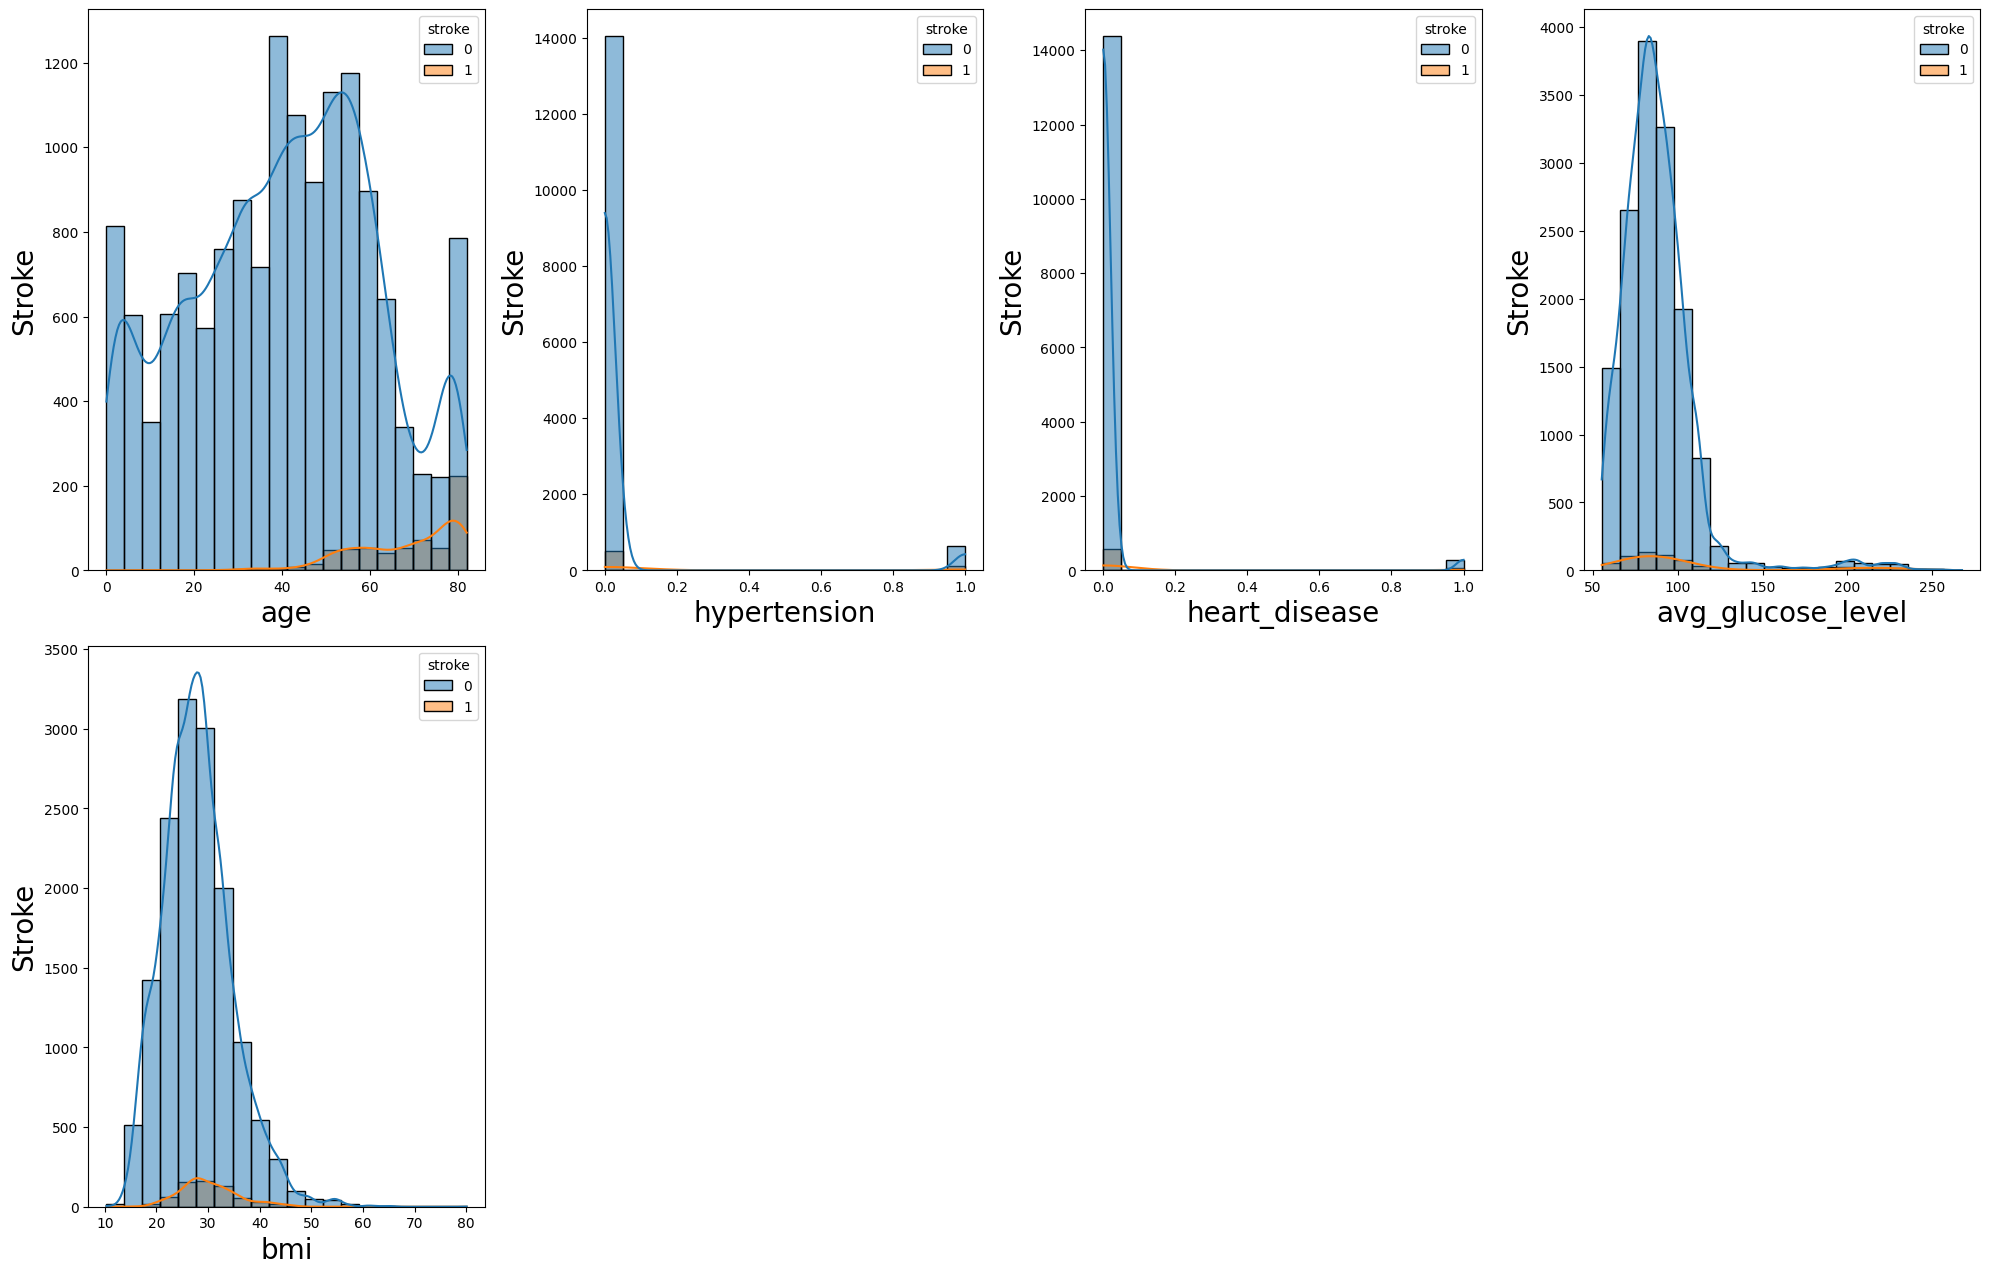

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_col.drop('stroke',axis=1):
    if plotnumber<= 16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=num_col[column],hue=data['stroke'],kde = True,bins=20)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Stroke',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Insights:**

- As the age increases there is high chance of getting projected to the stroke.

- For those category of people subjected to hypertension has a high chance of getting projected to the stroke.

-  For those category of people subjected to heartDisease has a high chance of getting projected to the stroke.

- As the glucose level increases there is high chance of getting projected to the stroke.

- BMI too acts the same way as glucose and age

We'll analyse how categorical attribute is acting aganist target stroke

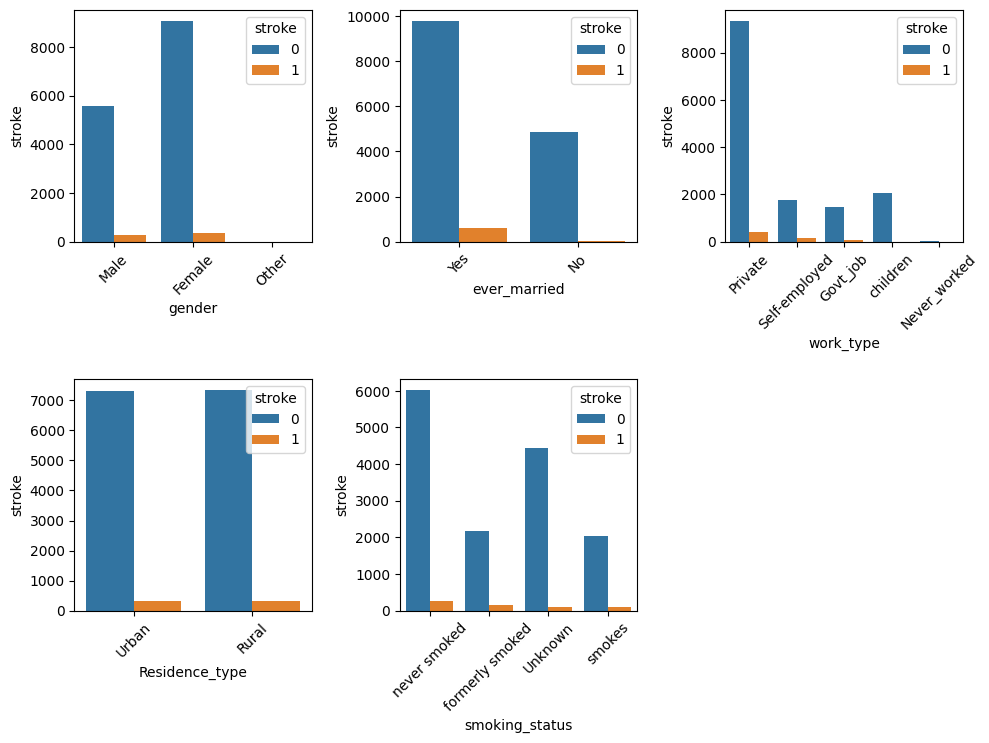

In [ ]:
# count plot
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in cat_col:
    if plotnumber<=6 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(x=cat_col[column],hue=data['stroke'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('stroke',fontsize=10)
        plt.xticks(rotation=45)
    plotnumber+=1
plt.tight_layout()

- Insights
  
  - Females are projected to stroke more is what the data analysis tells

  - Married are projected to stroke more

  - People in private jobs are projected to stroke more

  - People in Urban are projected to stroke more

  - Smokers should be always be careful about all the health care measures


- Multi variate Analysis

 - Analysing all the numerical columns togther, keeping it aganist target.



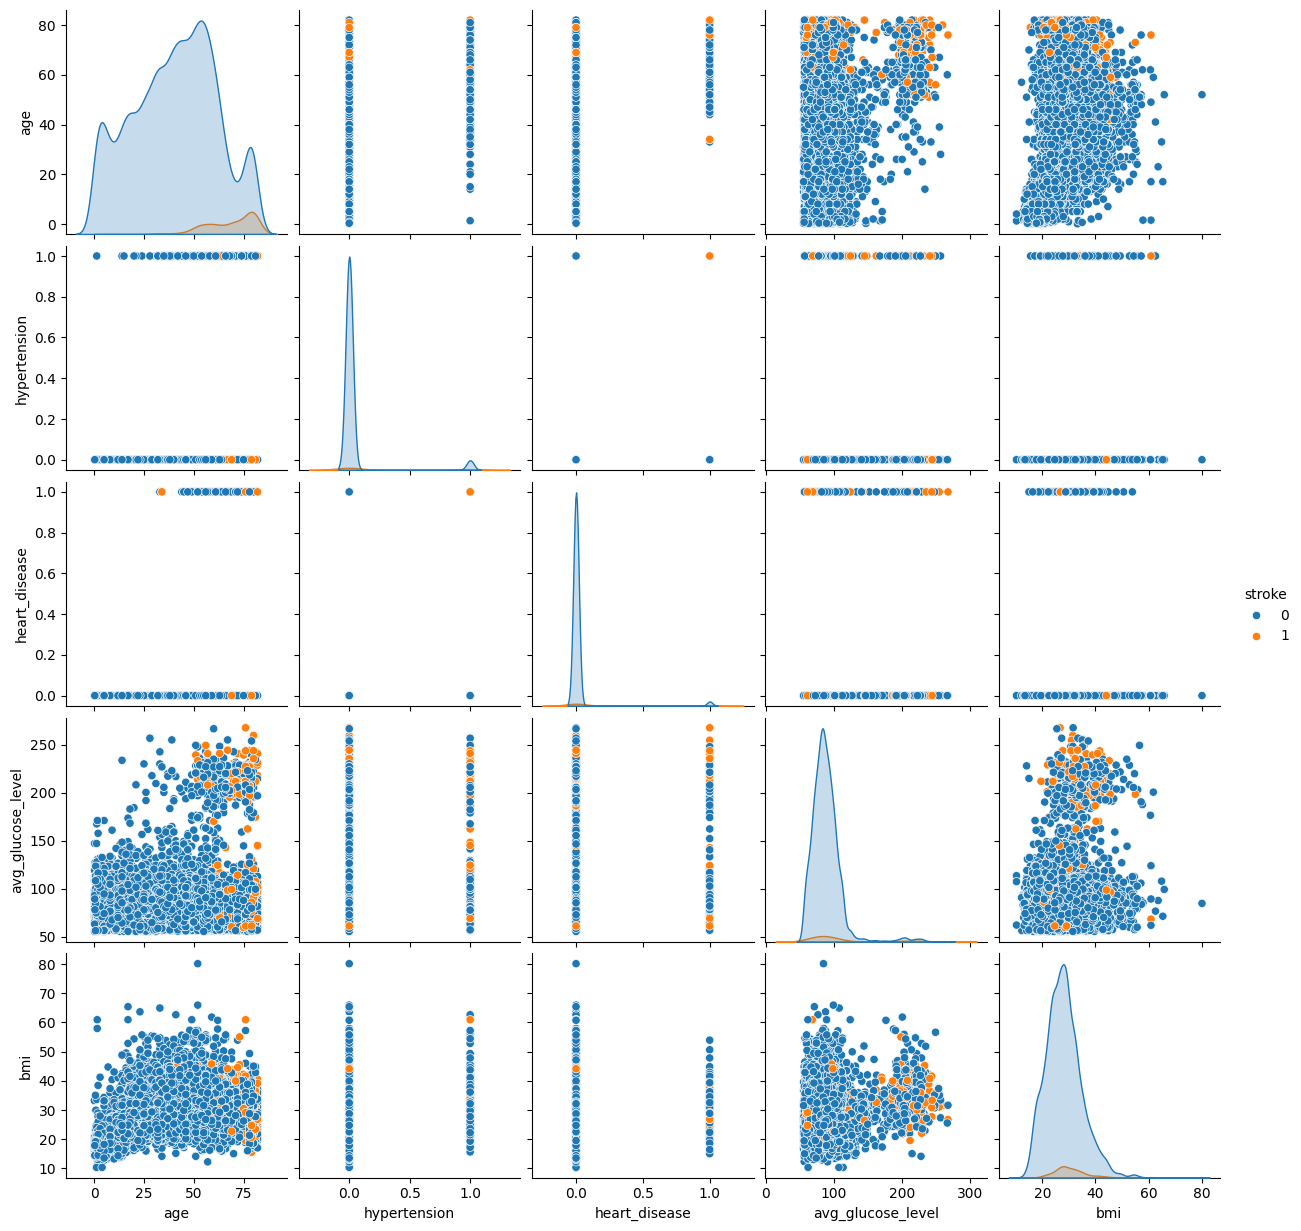

In [ ]:
sns.pairplot(data,hue='stroke')

## **Data Preprocessing  / Data cleaning**

 -  Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a format suitable for analysis or modeling

### **Checking for null values**

In [ ]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

- There are missing values in the data.

- If the data has a missing values, then we need to handle by replacing the missing values by either mean , median or mode depending up on the distribution and datatype of the column

###**Checking for duplicates**

In [ ]:
data.duplicated().sum()

0

- The data has no missing values.

- If the data has a missing value, we handle them by dropping records.Since sending the original data once is enough for the model to learn

###  **Checking for outliers**,

  - since all the algorithms applied on the data assumnes the data is been handled with outliers

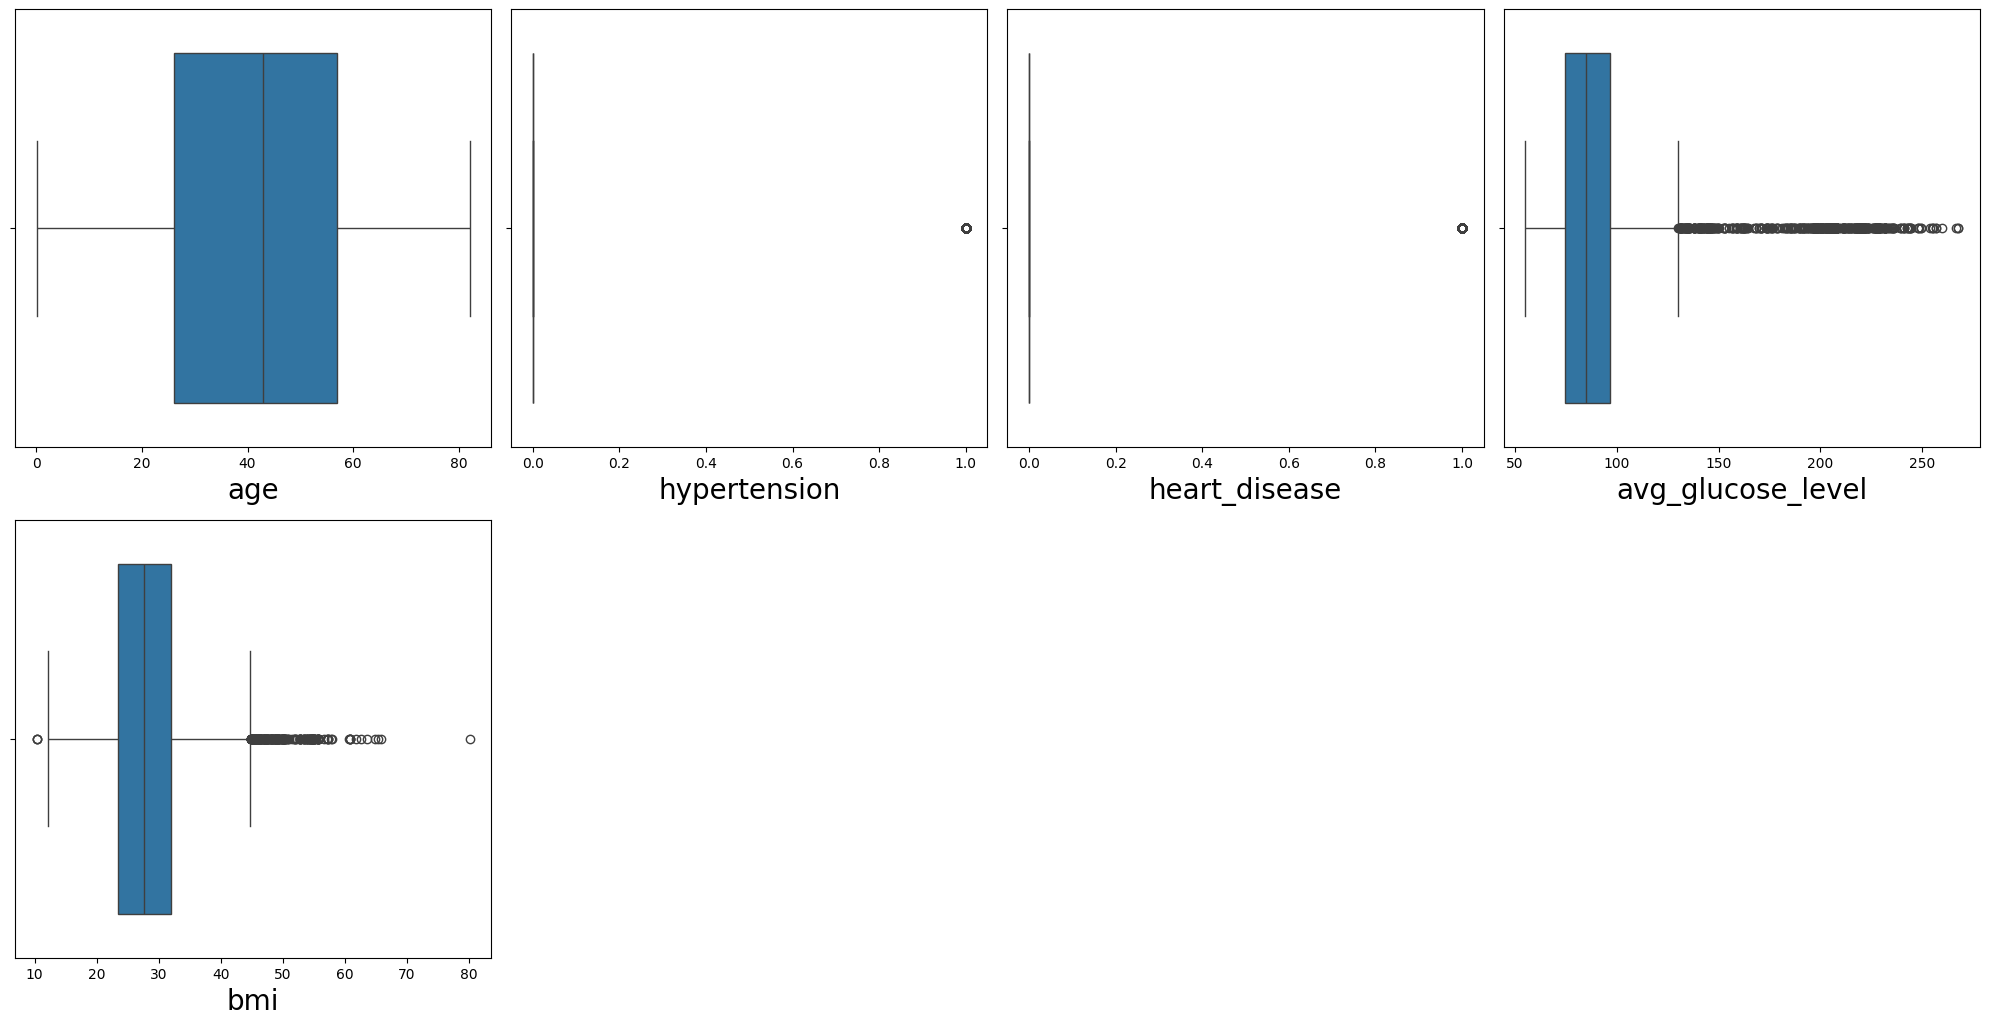

In [ ]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in num_col.drop('stroke',axis=1):
    if plotnumber<= 16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- The columns which has outliers are hypertension, heart disease,  avg_glucose_level , bmi

- We'll handle the outliers,

    - by checking the distribution of the columns "avg_glucose_level" , "bmi" .
    - "heart_disease","hypertension" for these two columns we do not anything as they are descrete columns


In [ ]:
df2 = data[['avg_glucose_level', 'bmi']]

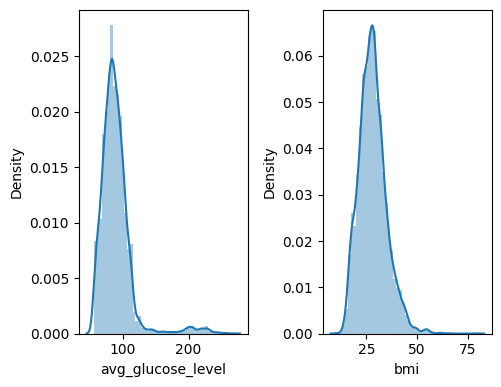

In [ ]:
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in df2:
    if plotnumber<= 16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

### **Data transformation - box cox**
   
   - Why opted box - cox data transformation?

      - The Box-Cox transformation is a family of power transformations that includes the logarithm as a special case. It is useful when you're not sure which transformation is appropriate and can handle both positive and zero values.

- Idea is to apply transfromation for avg_glucose and bmi to see is there any change in the distribution and rechecking for outliers

- Why not to other two columns is as they are descrete columns


In [ ]:
from scipy.stats import boxcox
transformed_data_glu, lambda_value = boxcox(data['avg_glucose_level'])


<Axes: ylabel='Density'>

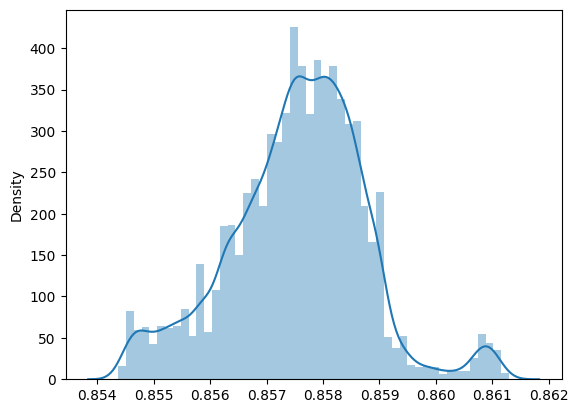

In [ ]:
sns.distplot(transformed_data_glu,kde=True)

In [ ]:
from scipy.stats import boxcox
transformed_data_bmi, lambda_value = boxcox(data['bmi'])

<Axes: ylabel='Density'>

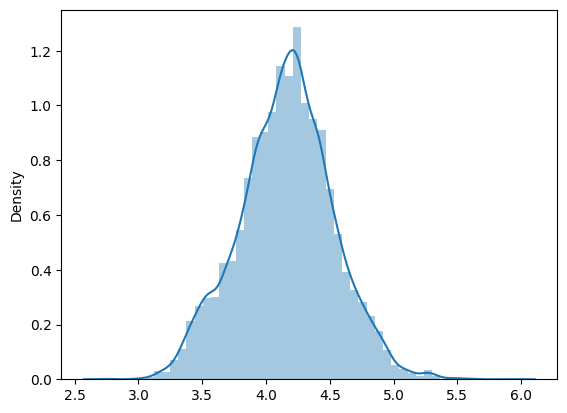

In [ ]:
sns.distplot(transformed_data_bmi,kde=True)

In [ ]:
transformed_data_df = pd.DataFrame({'transformed_data_glu': transformed_data_glu})


Text(0.5, 1.0, 'Box Plot for Transformed Glucose Level')

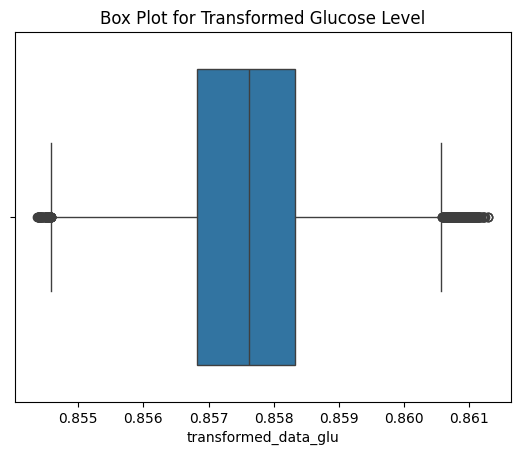

In [ ]:
sns.boxplot(data=transformed_data_df, x='transformed_data_glu')
plt.title('Box Plot for Transformed Glucose Level')


outliers are still there, but when compared before transformation it has reduced

Text(0.5, 1.0, 'Box Plot for Transformed BMI Level')

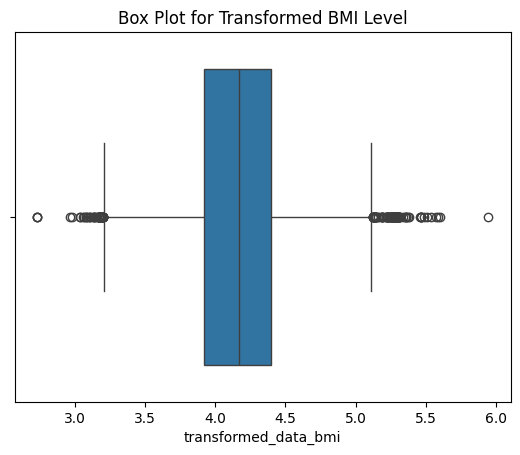

In [ ]:
transformed_data_df1 = pd.DataFrame({'transformed_data_bmi': transformed_data_bmi})
sns.boxplot(data=transformed_data_df1, x='transformed_data_bmi')
plt.title('Box Plot for Transformed BMI Level')

- The box-cox transformation applied to the two columns are working by making the skewed distribution column to normally distributed.


- The avg_glucose_level column and bmi transformation is working, so retaining and making it a inplace change in the column

In [ ]:
data['avg_glucose_level'], lambda_value = boxcox(data['avg_glucose_level'])
data['bmi'], lambda_value = boxcox(data['bmi'])

## Handling the outliers by IQR method

In [ ]:
#we'll handle by IQR, df2 has all the columns which has outliers
Q1=df2.quantile(0.25)

Q3=df2.quantile(0.75)

In [ ]:
IQR = Q3-Q1
IQR

avg_glucose_level    22.08
bmi                   8.50
dtype: float64

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

In [ ]:
lower_limit

avg_glucose_level    41.78
bmi                  10.75
dtype: float64

In [ ]:
upper_limit

avg_glucose_level    130.10
bmi                   44.75
dtype: float64

In [ ]:
percentage = (df2<lower_limit).sum()/len(data)*100 + (df2>upper_limit).sum()/len(data)*100
percentage

avg_glucose_level    3.561160
bmi                  1.640094
dtype: float64

In [ ]:
for i in df2:
  data.loc[data[i]<lower_limit[i],i]=data[i].median()

In [ ]:
for i  in df2:
  data.loc[data[i]>upper_limit[i],i] = data[i].median()

The outliers are handled

### **Encoding**

In [ ]:
cat_col.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
df1 = pd.get_dummies(data['gender'],prefix='gender',drop_first=True)
data = pd.concat([data,df1],axis=1).drop('gender',axis=1)

In [ ]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other
0,28.0,0.0,0.0,Yes,Private,Urban,0.857626,31.1,never smoked,0,1,0
1,33.0,0.0,0.0,Yes,Private,Rural,0.857626,23.9,formerly smoked,0,1,0
2,42.0,0.0,0.0,Yes,Private,Rural,0.857626,40.3,Unknown,0,0,0
3,56.0,0.0,0.0,Yes,Private,Urban,0.857626,28.8,never smoked,0,1,0
4,24.0,0.0,0.0,No,Private,Rural,0.857626,28.8,never smoked,0,0,0


The below columns are ordered data so encoding by label encoder

In [ ]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [ ]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = data[['ever_married','smoking_status','Residence_type']]
encoder = LabelEncoder()
for i in le:
  data[i] = encoder.fit_transform(data[i])

In [ ]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other
0,28.0,0.0,0.0,1,Private,1,0.857626,31.1,2,0,1,0
1,33.0,0.0,0.0,1,Private,0,0.857626,23.9,1,0,1,0
2,42.0,0.0,0.0,1,Private,0,0.857626,40.3,0,0,0,0
3,56.0,0.0,0.0,1,Private,1,0.857626,28.8,2,0,1,0
4,24.0,0.0,0.0,0,Private,0,0.857626,28.8,2,0,0,0


In [ ]:
data['work_type'].unique()

#encoding my manual mapping

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

<Axes: xlabel='work_type', ylabel='count'>

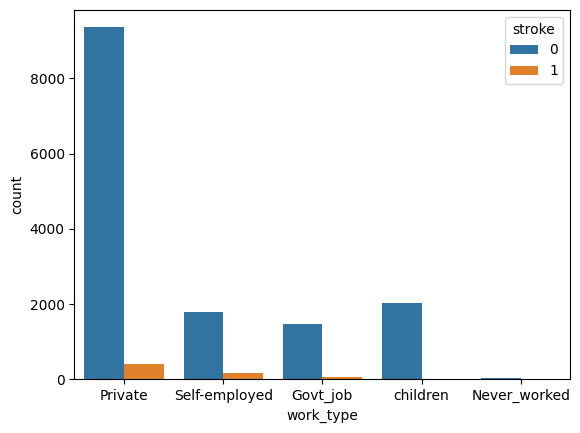

In [ ]:
sns.countplot(x=data['work_type'],hue=data['stroke'])

In [ ]:
data['work_type'] = data['work_type'].map({'Private':4, 'Self-employed':3, 'Govt_job':2, 'children':1, 'Never_worked':0})

In [ ]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other
0,28.0,0,0,1,4,1,0.857626,4.168248,2,0,1,0
1,33.0,0,0,1,4,0,0.857626,4.168248,1,0,1,0
2,42.0,0,0,1,4,0,0.857626,4.168248,0,0,0,0
3,56.0,0,0,1,4,1,0.857626,4.168248,2,0,1,0
4,24.0,0,0,0,4,0,0.857626,4.168248,2,0,0,0


The data is ready for feature selection


### **Feature** **selection**

<Axes: >

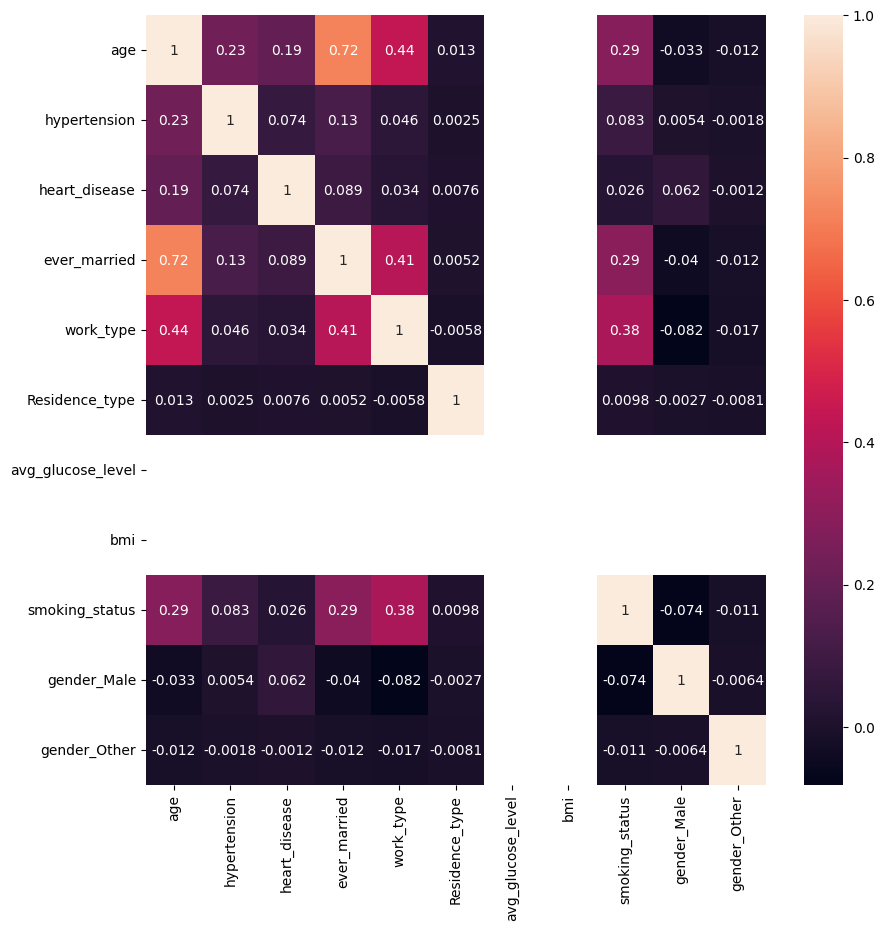

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.drop('stroke',axis=1).corr(),annot=True,annot_kws={'size':10})

There is no column to dropped, proceeding with model building

Splitting the data into

  1.Input ,target

  2.Training and testing

In [ ]:
x = data.drop('stroke',axis=1)
y = data['stroke']

In [ ]:
#split into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test),columns = x_test.columns)

In [ ]:
x_train.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Male,gender_Other
0,1.150030,-0.225191,-0.156472,0.692354,-0.232236,-0.999627,0.0,0.0,-1.321854,-0.787299,0.0
1,0.917151,-0.225191,-0.156472,-1.444348,0.666828,1.000373,0.0,0.0,-1.321854,-0.787299,0.0
2,-0.573279,-0.225191,-0.156472,-1.444348,-0.232236,-0.999627,0.0,0.0,0.569132,-0.787299,0.0
3,-1.178765,-0.225191,-0.156472,-1.444348,0.666828,-0.999627,0.0,0.0,-1.321854,1.270165,0.0
4,-0.619854,-0.225191,-0.156472,-1.444348,0.666828,1.000373,0.0,0.0,0.569132,-0.787299,0.0


In [ ]:
x_test.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender_Male,gender_Other
0,-0.713006,-0.225191,-0.156472,-1.444348,0.666828,1.000373,0.0,0.0,-1.321854,-0.787299,0.0
1,0.451392,-0.225191,-0.156472,0.692354,0.666828,1.000373,0.0,0.0,0.569132,-0.787299,0.0
2,0.358240,-0.225191,-0.156472,0.692354,0.666828,-0.999627,0.0,0.0,0.569132,-0.787299,0.0
3,0.125360,-0.225191,-0.156472,0.692354,0.666828,-0.999627,0.0,0.0,-1.321854,1.270165,0.0
4,0.823999,-0.225191,-0.156472,0.692354,-0.232236,-0.999627,0.0,0.0,-0.376361,1.270165,0.0


Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_smote,y_smote = sm.fit_resample(x_train,y_train)

###**Logistic Regression**

Model Implementation - 1st algorithm



In [ ]:
#import the algorithm
from sklearn.linear_model import LogisticRegression

#intialise
model1 = LogisticRegression()

#train
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import roc_curve,auc, accuracy_score,confusion_matrix
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred1)
auc(false_positive_rate,true_positive_rate)

0.5

In [ ]:
confusion_matrix(y_test,y_pred1)

array([[4402,    0],
       [ 190,    0]])

In [ ]:
accuracy_score(y_test,y_pred1)

0.9586236933797909

### **SVC - Support Vector Classifier**

In [ ]:
#import the algorithm
from sklearn.svm import SVC

#initialise
model2 = SVC()

#train the model
model2.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred2)
auc(false_positive_rate,true_positive_rate)

0.5

In [ ]:
confusion_matrix(y_test,y_pred2)

array([[4402,    0],
       [ 190,    0]])

In [ ]:
accuracy_score(y_test,y_pred2)

0.9586236933797909

### **Decision Tree**

In [ ]:
#import the algorithm
from sklearn.tree import DecisionTreeClassifier

#initialise
model3 = DecisionTreeClassifier()

#train the model
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3 = model3.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred3)
auc(false_positive_rate,true_positive_rate)

0.5319962218130515

In [ ]:
confusion_matrix(y_test,y_pred3)

array([[4313,   89],
       [ 174,   16]])

In [ ]:
accuracy_score(y_test,y_pred3)

0.9427264808362369

### **Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a Random Forest classifier
model4 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest on the training data
model4.fit(x_train, y_train)

# Make predictions on the testing data
y_pred4 = model4.predict(x_test)

In [ ]:
## auc score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred4)
print('AUC',auc(false_positive_rate,true_positive_rate))

AUC 0.5336999928262273


In [ ]:
confusion_matrix(y_test,y_pred4)

array([[4328,   74],
       [ 174,   16]])

In [ ]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred4)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.60%


### Comparision of all the 4 models accuracy as a evaluation metrix

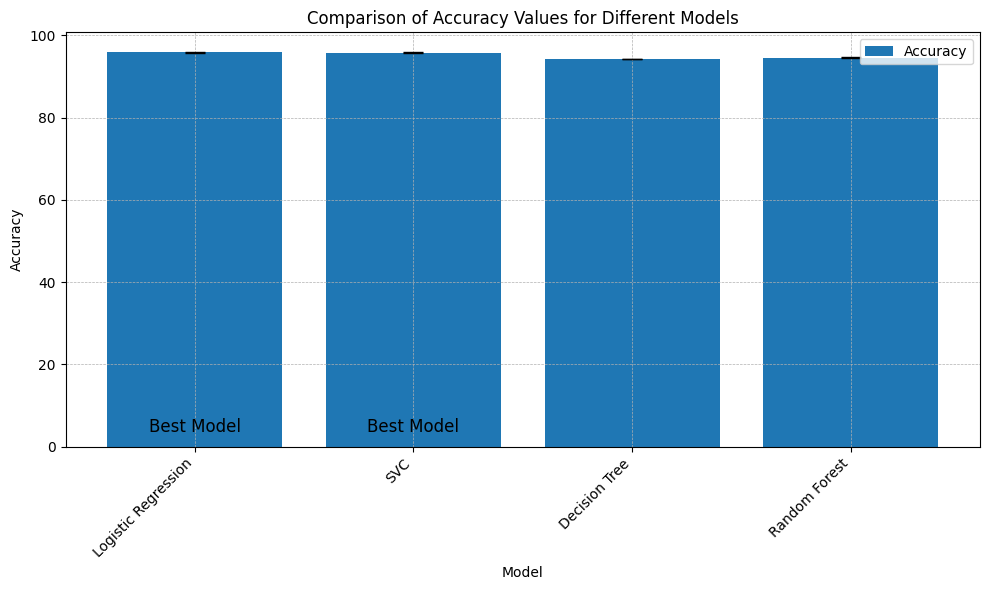

In [ ]:


# Sample accuracy values for various models (replace with your actual data)
model_names = ["Logistic Regression", "SVC","Decision Tree", "Random Forest"]
acc_values = [95.86,95.84,94.27,94.60]

# Create a bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(model_names, acc_values, yerr=np.random.rand(len(acc_values)) * 0.2,  # Random error bars for demonstration
        capsize=7, label='Accuracy')  # Ensure error bars are shown
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Values for Different Models')
plt.legend()

# Customize the plot as needed (e.g., colors, markers, grid, title, text annotations)
plt.grid(True, linestyle='--', linewidth=0.5)  # Add grid lines for better visualization
plt.text(1, 2.5, "Best Model", fontsize=12, ha='center', va='bottom')  # Annotate the best model
plt.text(0, 2.5, "Best Model", fontsize=12, ha='center', va='bottom')
# Save the plot as a PNG image
plt.tight_layout()

plt.show()

From the above graph we see Lgistic and SVC both give the same accuracy and can be taken as best fit models for the data

### **Conclusion**

- In conclusion, the stroke prediction model developed in this analysis demonstrated promising results. The model, built using a SVC and Logistic Regression, exhibited accuracy 95% , suggesting its effectiveness in identifying individuals at risk of experiencing a stroke.

- In practical terms, the stroke prediction model could serve as a useful tool for early intervention and preventive care in clinical settings. However, its deployment should be done cautiously, considering ethical implications and ensuring transparency in communicating predictions to both healthcare providers and individuals.

- In conclusion, while the model shows promise, ongoing refinement and validation efforts are necessary before considering widespread implementation in real-world healthcare scenarios.